<a href="https://colab.research.google.com/github/vaib-p/Ml-Lab-TEIT/blob/main/Pract3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('Admission_Pred.csv');

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
df.shape

(500, 9)

In [12]:
from sklearn.preprocessing import Binarizer
bi=Binarizer(threshold=0.75)
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']]);

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
495    1.0
496    1.0
497    1.0
498    0.0
499    1.0
Name: Chance of Admit , Length: 500, dtype: float64

In [17]:
x=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

In [19]:
x


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [21]:
y=y.astype('int')

In [22]:
y

0      1
1      1
2      0
3      1
4      0
      ..
495    1
496    1
497    1
498    0
499    1
Name: Chance of Admit , Length: 500, dtype: int64

<Axes: xlabel='Chance of Admit ', ylabel='count'>

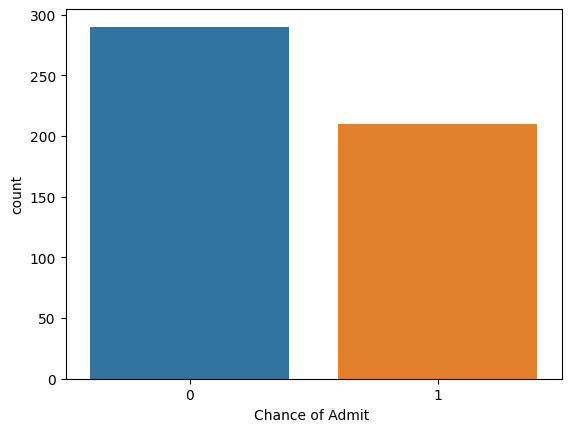

In [23]:
sns.countplot(x=y)

In [25]:
y.value_counts()

0    290
1    210
Name: Chance of Admit , dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split( x,y,random_state=0,test_size=0.25)

In [28]:
x_train.shape

(375, 8)

In [29]:
x_test.shape

(125, 8)

In [30]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [31]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred=model.predict(x_test)

In [35]:
result=pd.DataFrame({
    'Actual': y_test,
    'predicted': y_pred
})

In [36]:
result

,Actual,predicted
90,0,0
254,1,1
283,1,1
445,1,1
461,0,0
...,...,...
430,0,0
49,1,0
134,1,1
365,1,1


In [37]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

In [40]:
from sklearn.metrics import classification_report

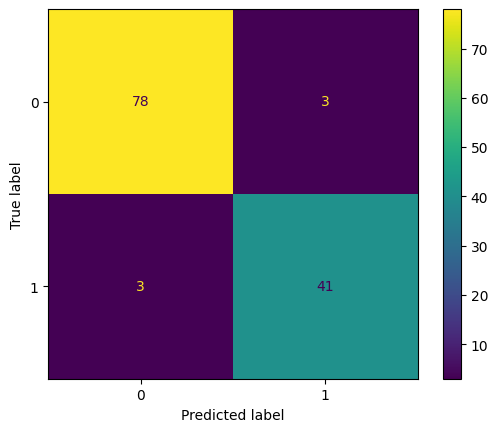

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [42]:
accuracy_score(y_test,y_pred)

0.952

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        81
           1       0.93      0.93      0.93        44

    accuracy                           0.95       125
   macro avg       0.95      0.95      0.95       125
weighted avg       0.95      0.95      0.95       125



In [45]:
from sklearn.tree import plot_tree

In [52]:
import matplotlib.pyplot as plt


<Figure size 1200x2000 with 0 Axes>

<Figure size 1200x2000 with 0 Axes>

[Text(0.5352564102564102, 0.9583333333333334, 'CGPA <= 8.735\ngini = 0.493\nsamples = 375\nvalue = [209, 166]\nclass = NA'),
 Text(0.2564102564102564, 0.875, 'GRE Score <= 318.5\ngini = 0.211\nsamples = 217\nvalue = [191, 26]\nclass = NA'),
 Text(0.14102564102564102, 0.7916666666666666, 'CGPA <= 8.25\ngini = 0.103\nsamples = 183\nvalue = [173, 10]\nclass = NA'),
 Text(0.11538461538461539, 0.7083333333333334, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]\nclass = NA'),
 Text(0.16666666666666666, 0.7083333333333334, 'SOP <= 4.75\ngini = 0.224\nsamples = 78\nvalue = [68, 10]\nclass = NA'),
 Text(0.10256410256410256, 0.625, 'TOEFL Score <= 99.5\ngini = 0.191\nsamples = 75\nvalue = [67, 8]\nclass = NA'),
 Text(0.05128205128205128, 0.5416666666666666, 'Serial No. <= 361.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = NA'),
 Text(0.02564102564102564, 0.4583333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = AD'),
 Text(0.07692307692307693, 0.4583333333333333, 'gini = 0.0\nsamp

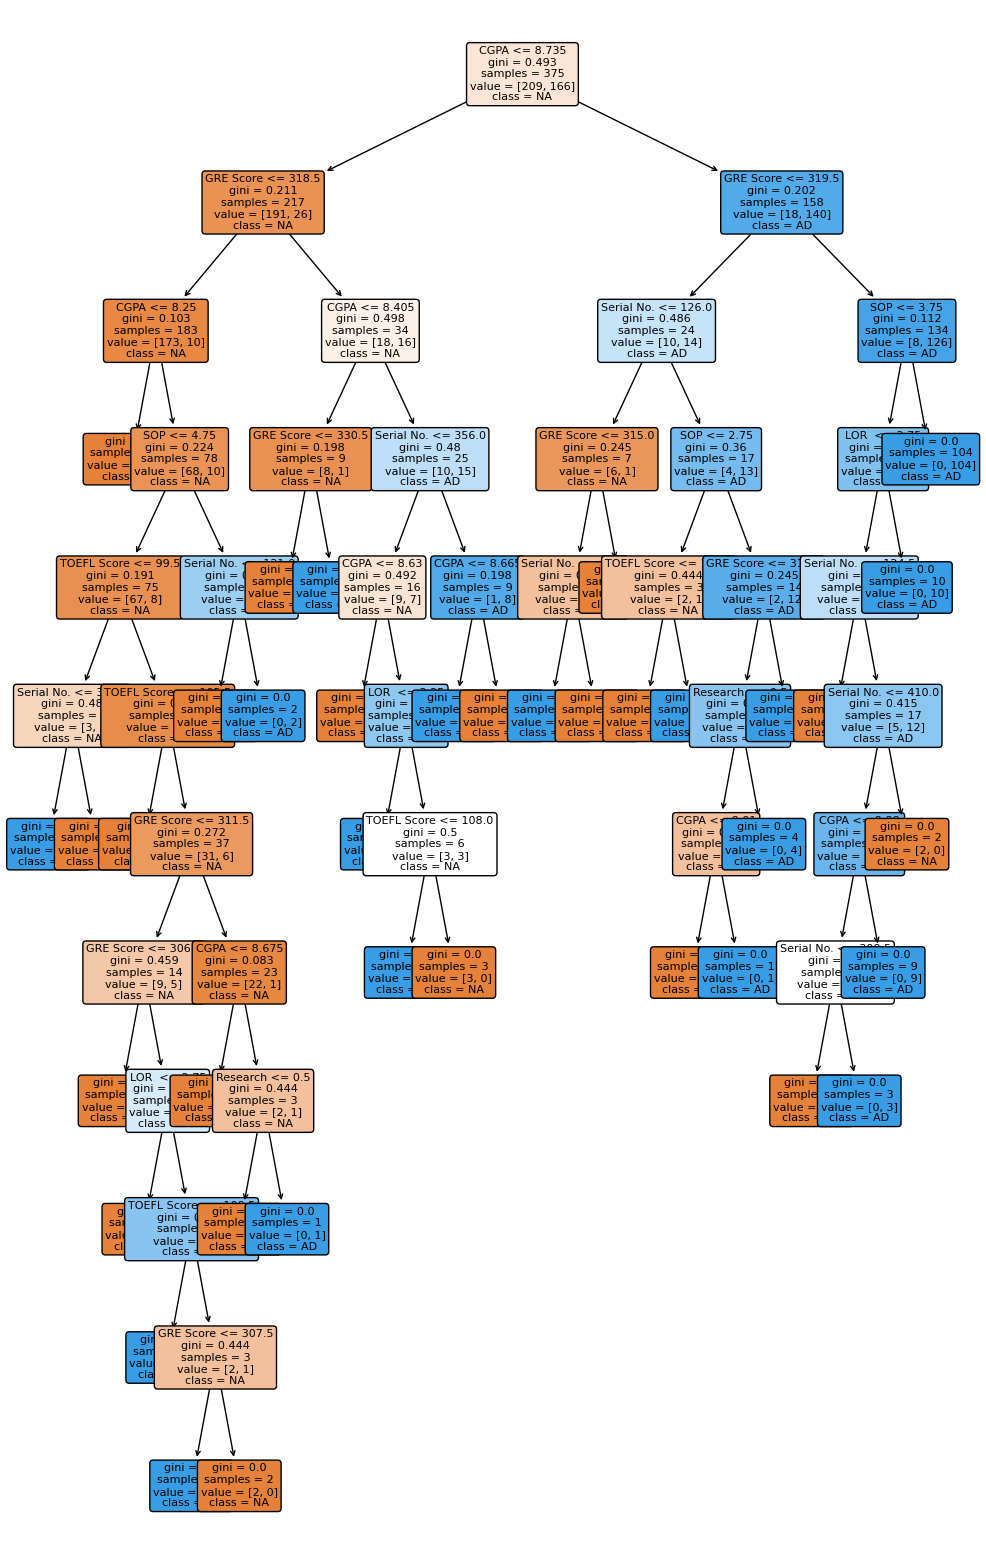

In [55]:
plt.figure(figsize=(12,20))
plot_tree(model, fontsize=8,filled=True, rounded=True
          ,feature_names=x.columns, class_names=['NA','AD'])